In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [2]:
books = pd.read_csv("booksfinal.csv")
ratings = pd.read_csv("Rating.csv")

In [3]:
VC = ratings['ratings_count']
VA = ratings['average_rating']
B = ratings['average_rating'].mean()
M = ratings['ratings_count'].quantile(0.80)

In [4]:
ratings['weighted_average']=(VC/(VC+M)*VA)+(M/(M+VC)*B)

In [5]:
ranks = ratings.sort_values('weighted_average', ascending=False)

In [6]:
ranks[['isbn','ratings_count','average_rating','weighted_average']].head(15)

,isbn,ratings_count,average_rating,weighted_average
24,545010225,1746574,4.61,4.592417
412,545044251,190050,4.74,4.581409
26,439785960,1678823,4.54,4.523821
17,043965548X,1832823,4.53,4.515418
23,439139600,1753043,4.53,4.514773
187,075640407X,400101,4.55,4.486889
132,055357342X,469022,4.54,4.486235
551,765326353,144822,4.64,4.471235
300,756404738,245686,4.57,4.470644
158,345339738,463959,4.51,4.458717


Text(0, 0.5, 'ISBN')

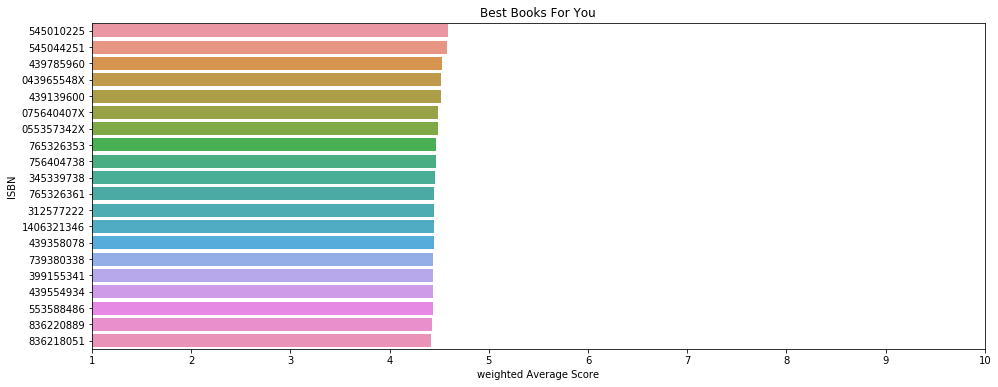

In [8]:
wavg = ranks.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(16,6))

ax = sns.barplot(x=wavg['weighted_average'].head(20), y=wavg['isbn'].head(20), data=wavg)

plt.xlim(1,10)

plt.title("Best Books For You")
plt.xlabel("Weighted Average Score")
plt.ylabel("ISBN")

In [9]:
books

,isbn,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,text_reviews_count,image_url,small_image_url,authorsmatch,titlesmatch,book_desc,genres,genresmatch
0,439023483,Suzanne Collins,2008,The Hunger Games,eng,4.34,4780653,155254,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,suzannecollins,thehungergames,Winning will make you famous. Losing means cer...,Young Adult,youngadult
1,316015849,Stephenie Meyer,2005,Twilight,en-US,3.57,3866839,95009,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,stepheniemeyer,twilight,About three things I was absolutely positive.F...,Young Adult,youngadult
2,61120081,Harper Lee,1960,To Kill a Mockingbird,eng,4.25,3198671,72586,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,harperlee,tokillamockingbird,The unforgettable novel of a childhood in a sl...,Classics,classics
3,743273567,F. Scott Fitzgerald,1925,The Great Gatsby,eng,3.89,2683664,51992,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,fscottfitzgerald,thegreatgatsby,Alternate Cover Edition ISBN: 0743273567 (ISBN...,Classics,classics
4,525478817,John Green,2012,The Fault in Our Stars,eng,4.26,2346404,140739,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,johngreen,thefaultinourstars,Despite the tumor-shrinking medical miracle th...,Young Adult,youngadult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5585,1416523723,Herman Melville,1924,"Billy Budd, Sailor",eng,3.09,10866,681,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,hermanmelville,billybuddsailor,A handsome young sailor is unjustly accused of...,Classics,classics
5586,441019455,Ilona Andrews,2010,Bayou Moon,eng,4.09,17204,1180,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,ilonaandrews,bayoumoon,"The Edge lies between worlds, on the border be...",Fantasy,fantasy
5587,067973371X,Robert A. Caro,1990,Means of Ascent,eng,4.25,12582,395,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,robertacaro,meansofascent,"Robert A. Caro's life of Lyndon Johnson, which...",Biography,biography
5588,039330762X,Patrick O'Brian,1977,The Mauritius Command,eng,4.35,9421,374,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,patrickobrian,themauritiuscommand,"""O'Brian's Aubrey-Maturin volumes actually con...",Historical,historical


In [10]:
tfv = TfidfVectorizer(min_df = 3, max_features=None, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', ngram_range={1,3}, use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')

In [11]:
books['book_desc']=books['book_desc'].fillna('')
tfv_mat=tfv.fit_transform(books['book_desc'])

sig=sigmoid_kernel(tfv_mat, tfv_mat)
ind=pd.Series(books.index, index=books['isbn']).drop_duplicates()

In [14]:
ind

isbn
439023483        0
316015849        1
61120081         2
743273567        3
525478817        4
              ... 
1416523723    5585
441019455     5586
067973371X    5587
039330762X    5588
61711527      5589
Length: 5590, dtype: int64

In [20]:
def recommend(isbn, sig=sig):
    idr=ind[isbn]
    sig_scores=list(enumerate(sig[idr]))
    sig_scores=sorted(sig_scores, key=lambda x: x[1], reverse=True)
    m_ind=[i[0] for i in sig_scores]
    return ratings['isbn'].iloc[m_ind]

In [21]:
recommend('439023483')

0        439023483
13       452284244
16       439023491
491     1582406723
2174     679763309
           ...    
5530    1416543791
5560     741444569
5566      60841826
5569     439672465
5579     385344015
Name: isbn, Length: 5590, dtype: object